In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set()
% matplotlib inline

In [138]:
train_x = pd.read_csv('X_train.csv')
train_x.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [139]:
train_y = pd.read_csv('y_train.csv')
train_y.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


In [140]:
train_y['surface'].value_counts()

concrete                  779
soft_pvc                  732
wood                      607
tiled                     514
fine_concrete             363
hard_tiles_large_space    308
soft_tiles                297
carpet                    189
hard_tiles                 21
Name: surface, dtype: int64

In [141]:
test_x = pd.read_csv('X_test.csv')
test_x.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.025773,-0.98864,-0.14801,0.003350,-0.006524,-0.001071,-0.027390,0.10043,4.2061,-5.5439
1,0_1,0,1,-0.025683,-0.98862,-0.14816,0.003439,-0.113960,0.083987,-0.060590,-0.70889,3.9905,-8.0273
2,0_2,0,2,-0.025617,-0.98861,-0.14826,0.003571,-0.080518,0.114860,-0.037177,1.45710,2.2828,-11.2990
3,0_3,0,3,-0.025566,-0.98862,-0.14817,0.003609,0.070067,0.033820,-0.035904,0.71096,1.8582,-12.2270
4,0_4,0,4,-0.025548,-0.98866,-0.14792,0.003477,0.152050,-0.029016,-0.015314,3.39960,2.7881,-10.4100


In [142]:
##https://www.kaggle.com/prashantkikani/help-humanity-by-helping-robots
def fe(df):
    df['total_angular_velocity'] = (df['angular_velocity_X'] ** 2 + df['angular_velocity_Y'] ** 2 + df['angular_velocity_Z'] ** 2) ** 0.5
    df['total_linear_acceleration'] = (df['linear_acceleration_X'] ** 2 + df['linear_acceleration_Y'] ** 2 + df['linear_acceleration_Z'] ** 2) ** 0.5
    df['total_xyz'] = (df['orientation_X']**2 + df['orientation_Y']**2 +df['orientation_Z'])**0.5
    
    df['acc_vs_vel'] = df['total_linear_acceleration'] / df['total_angular_velocity']
    
    
    temp_df = pd.DataFrame()
    for col in df.columns[3:]:
        temp_df[col + '_mean'] = df.groupby(['series_id'])[col].mean()
        temp_df[col + '_median'] = df.groupby(['series_id'])[col].median()
        temp_df[col + '_max'] = df.groupby(['series_id'])[col].max()
        temp_df[col + '_min'] = df.groupby(['series_id'])[col].min()
        temp_df[col + '_std'] = df.groupby(['series_id'])[col].std()
        temp_df[col + '_range'] = temp_df[col + '_max'] - temp_df[col + '_min']
        temp_df[col + '_maxtoMin'] = temp_df[col + '_max'] / temp_df[col + '_min']
        temp_df[col + '_mean_abs_chg'] = df.groupby(['series_id'])[col].apply(lambda x: np.mean(np.abs(np.diff(x))))
        temp_df[col + '_abs_min'] = df.groupby(['series_id'])[col].apply(lambda x: np.min(np.abs(x)))
        temp_df[col + '_abs_max'] = df.groupby(['series_id'])[col].apply(lambda x: np.max(np.abs(x)))
        temp_df[col + '_abs_avg'] = (temp_df[col + '_abs_min'] + temp_df[col + '_abs_max'])/2
    return temp_df

In [143]:
X_train = fe(train_x)
X_test = fe(test_x)
print(train_x.shape)

(487680, 17)


In [144]:
X_train.head()

,orientation_X_mean,orientation_X_median,orientation_X_max,orientation_X_min,orientation_X_std,orientation_X_range,orientation_X_maxtoMin,orientation_X_mean_abs_chg,orientation_X_abs_min,orientation_X_abs_max,...,acc_vs_vel_median,acc_vs_vel_max,acc_vs_vel_min,acc_vs_vel_std,acc_vs_vel_range,acc_vs_vel_maxtoMin,acc_vs_vel_mean_abs_chg,acc_vs_vel_abs_min,acc_vs_vel_abs_max,acc_vs_vel_abs_avg
series_id,,,,,,,,,,,,,,,,,,,,,
0,-0.758666,-0.758530,-0.75822,-0.75953,0.000363,0.00131,0.998275,0.000015,0.75822,0.75953,...,187.471573,995.561076,56.133014,135.641510,939.428062,17.735749,114.896199,56.133014,995.561076,525.847045
1,-0.958606,-0.958595,-0.95837,-0.95896,0.000151,0.00059,0.999385,0.000023,0.95837,0.95896,...,98.477877,611.826712,32.938319,88.488750,578.888393,18.574922,57.943094,32.938319,611.826712,322.382516
2,-0.512057,-0.512035,-0.50944,-0.51434,0.001377,0.00490,0.990473,0.000041,0.50944,0.51434,...,146.667138,904.269577,52.834789,132.789650,851.434788,17.115041,83.878164,52.834789,904.269577,478.552183
3,-0.939169,-0.939170,-0.93884,-0.93968,0.000227,0.00084,0.999106,0.000026,0.93884,0.93968,...,84.403391,805.924410,11.305069,112.264757,794.619341,71.288762,76.773215,11.305069,805.924410,408.614740
4,-0.891301,-0.890940,-0.88673,-0.89689,0.002955,0.01016,0.988672,0.000080,0.88673,0.89689,...,61.430180,111.588333,39.895232,16.611029,71.693101,2.797034,5.618844,39.895232,111.588333,75.741783


In [145]:
train_y.shape

(3810, 3)

In [146]:
X_train.fillna(0, inplace = True)
X_train.replace(-np.inf, 0, inplace = True)
X_train.replace(np.inf, 0, inplace = True)
X_test.fillna(0, inplace = True)
X_test.replace(-np.inf, 0, inplace = True)
X_test.replace(np.inf, 0, inplace = True)

In [147]:
X_train.shape

(3810, 154)

In [148]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_y['surface'] = le.fit_transform(train_y['surface'])

In [149]:
train_y['surface'].value_counts()

1    779
5    732
8    607
7    514
2    363
4    308
6    297
0    189
3     21
Name: surface, dtype: int64

In [150]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [151]:
X_train.head()

,orientation_X_mean,orientation_X_median,orientation_X_max,orientation_X_min,orientation_X_std,orientation_X_range,orientation_X_maxtoMin,orientation_X_mean_abs_chg,orientation_X_abs_min,orientation_X_abs_max,...,acc_vs_vel_median,acc_vs_vel_max,acc_vs_vel_min,acc_vs_vel_std,acc_vs_vel_range,acc_vs_vel_maxtoMin,acc_vs_vel_mean_abs_chg,acc_vs_vel_abs_min,acc_vs_vel_abs_max,acc_vs_vel_abs_avg
series_id,,,,,,,,,,,,,,,,,,,,,
0,-0.758666,-0.758530,-0.75822,-0.75953,0.000363,0.00131,0.998275,0.000015,0.75822,0.75953,...,187.471573,995.561076,56.133014,135.641510,939.428062,17.735749,114.896199,56.133014,995.561076,525.847045
1,-0.958606,-0.958595,-0.95837,-0.95896,0.000151,0.00059,0.999385,0.000023,0.95837,0.95896,...,98.477877,611.826712,32.938319,88.488750,578.888393,18.574922,57.943094,32.938319,611.826712,322.382516
2,-0.512057,-0.512035,-0.50944,-0.51434,0.001377,0.00490,0.990473,0.000041,0.50944,0.51434,...,146.667138,904.269577,52.834789,132.789650,851.434788,17.115041,83.878164,52.834789,904.269577,478.552183
3,-0.939169,-0.939170,-0.93884,-0.93968,0.000227,0.00084,0.999106,0.000026,0.93884,0.93968,...,84.403391,805.924410,11.305069,112.264757,794.619341,71.288762,76.773215,11.305069,805.924410,408.614740
4,-0.891301,-0.890940,-0.88673,-0.89689,0.002955,0.01016,0.988672,0.000080,0.88673,0.89689,...,61.430180,111.588333,39.895232,16.611029,71.693101,2.797034,5.618844,39.895232,111.588333,75.741783


In [152]:
X_train= X_train.astype(np.float32)

In [153]:
mis_val = X_train.isnull().sum()
mis_val 

orientation_X_mean                        0
orientation_X_median                      0
orientation_X_max                         0
orientation_X_min                         0
orientation_X_std                         0
orientation_X_range                       0
orientation_X_maxtoMin                    0
orientation_X_mean_abs_chg                0
orientation_X_abs_min                     0
orientation_X_abs_max                     0
orientation_X_abs_avg                     0
orientation_Y_mean                        0
orientation_Y_median                      0
orientation_Y_max                         0
orientation_Y_min                         0
orientation_Y_std                         0
orientation_Y_range                       0
orientation_Y_maxtoMin                    0
orientation_Y_mean_abs_chg                0
orientation_Y_abs_min                     0
orientation_Y_abs_max                     0
orientation_Y_abs_avg                     0
orientation_Z_mean              


param_grid = {
    'bootstrap': [False,True],
     'max_depth': [50, 70 ,100],
   'max_features': ['auto','sqrt'],
    'min_samples_leaf': [1, 5, 10],
   'min_samples_split': [4, 3, 2],
    'n_estimators': [500, 1000, 1500, 2000]
 }

clf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1)

grid_search.fit(X_train,train_y['surface'])

grid_search.get_params()

In [154]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3810 entries, 0 to 3809
Columns: 154 entries, orientation_X_mean to acc_vs_vel_abs_avg
dtypes: float32(154)
memory usage: 2.3 MB


In [155]:
clf = RandomForestClassifier(n_estimators = 2000,
                               max_depth=50, 
                             min_samples_split=4,
                             class_weight='balanced')
clf.fit(X_train,train_y['surface'])

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=50, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=2000, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [156]:
predictions_x_test=clf.predict(X_test)

In [161]:
print(predictions_x_test)

[4 0 7 ... 4 1 8]


In [167]:
submission=pd.DataFrame()
submission['surface'] = le.inverse_transform(predictions_x_test)
submission= submission.reset_index()
submission=submission.rename(index=str, columns={"index": "series_id","surface":"surface"})
submission.head()
submission.to_csv('submission.csv', index=False)

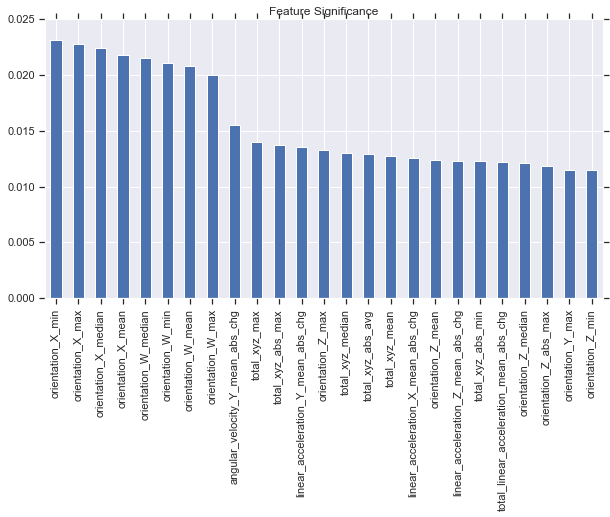

In [168]:

coef = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.show()